In [1]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset("titanic")
#titanic.to_csv('/Users/min0/Documents/Documents/school/4-1/빅데이터/자료/week07/DATA/titanic.csv', index = False)

In [5]:
titanic.info()
# 데이터 타입이 숫자가 아닌 건 분석이 어려워진다... 오브젝트나 카테고리(first, second...)나...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
print(titanic.isnull().sum())
# deck은 null이 많네...

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
# age에 null 많으니까 median값으로 강제 치환하기...: 어린이도 30살 되어버리니까 분석이 논란의 여지가..
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

print(titanic['embarked'].value_counts())
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

# deck도 다 C로 바꾸기
print(titanic['deck'].value_counts())
titanic['deck'] = titanic['deck'].fillna('C')

# null 없는지 확인
print(titanic.isnull().sum())

S    644
C    168
Q     77
Name: embarked, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [7]:
# 1이면 산 거, 0이면 죽은 거...
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

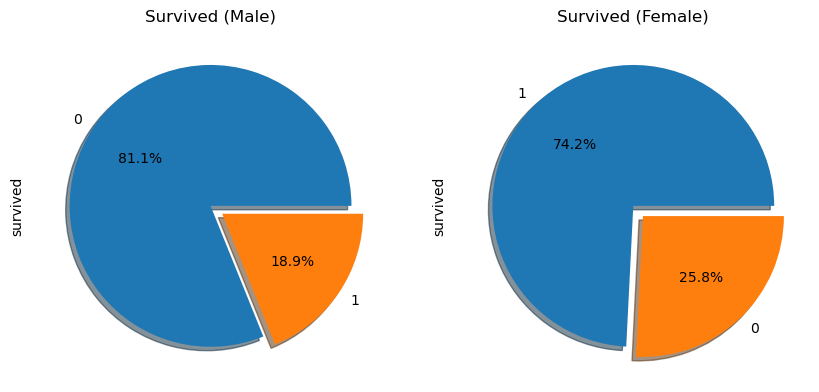

In [8]:
# 생종률 원형 그래프 그리기
import matplotlib.pyplot as plt
f,ax = plt.subplots(1, 2, figsize = (10, 5))
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot. \
    pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot. \
       pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

# 남자는 81.1이 죽고 여자는 74.2가 살았다.

/Users/min0/Downloads/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


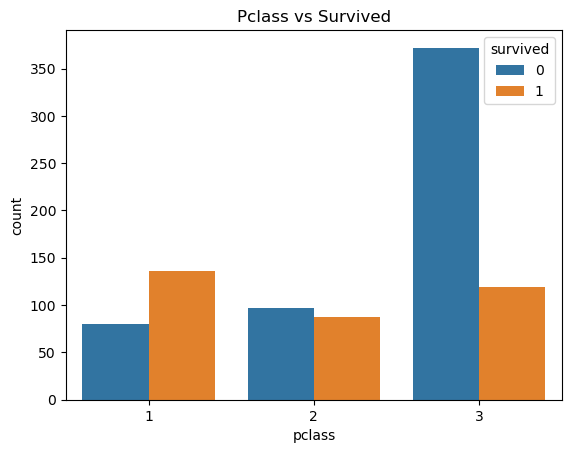

In [9]:
# pclass별 생존률(1등석, 2등석, 3등석) 
sns.countplot('pclass', hue = 'survived', data = titanic)
plt.title('Pclass vs Survived')
plt.show()
# => 3등석이 더 많이 사망...

In [10]:
# 생존률과 다른 변수와의 상관관계
titanic_corr = titanic.corr(method = 'pearson')
titanic_corr
#titanic_corr.to_csv('DATA/titanic_corr.csv', index = False)

# 양의 상관관곈계는 fare: 요금
# age는 중간값으로 해서 의미가 없어짐

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


-0.5570800422053259
0.2573065223849624


ValueError: object arrays are not supported

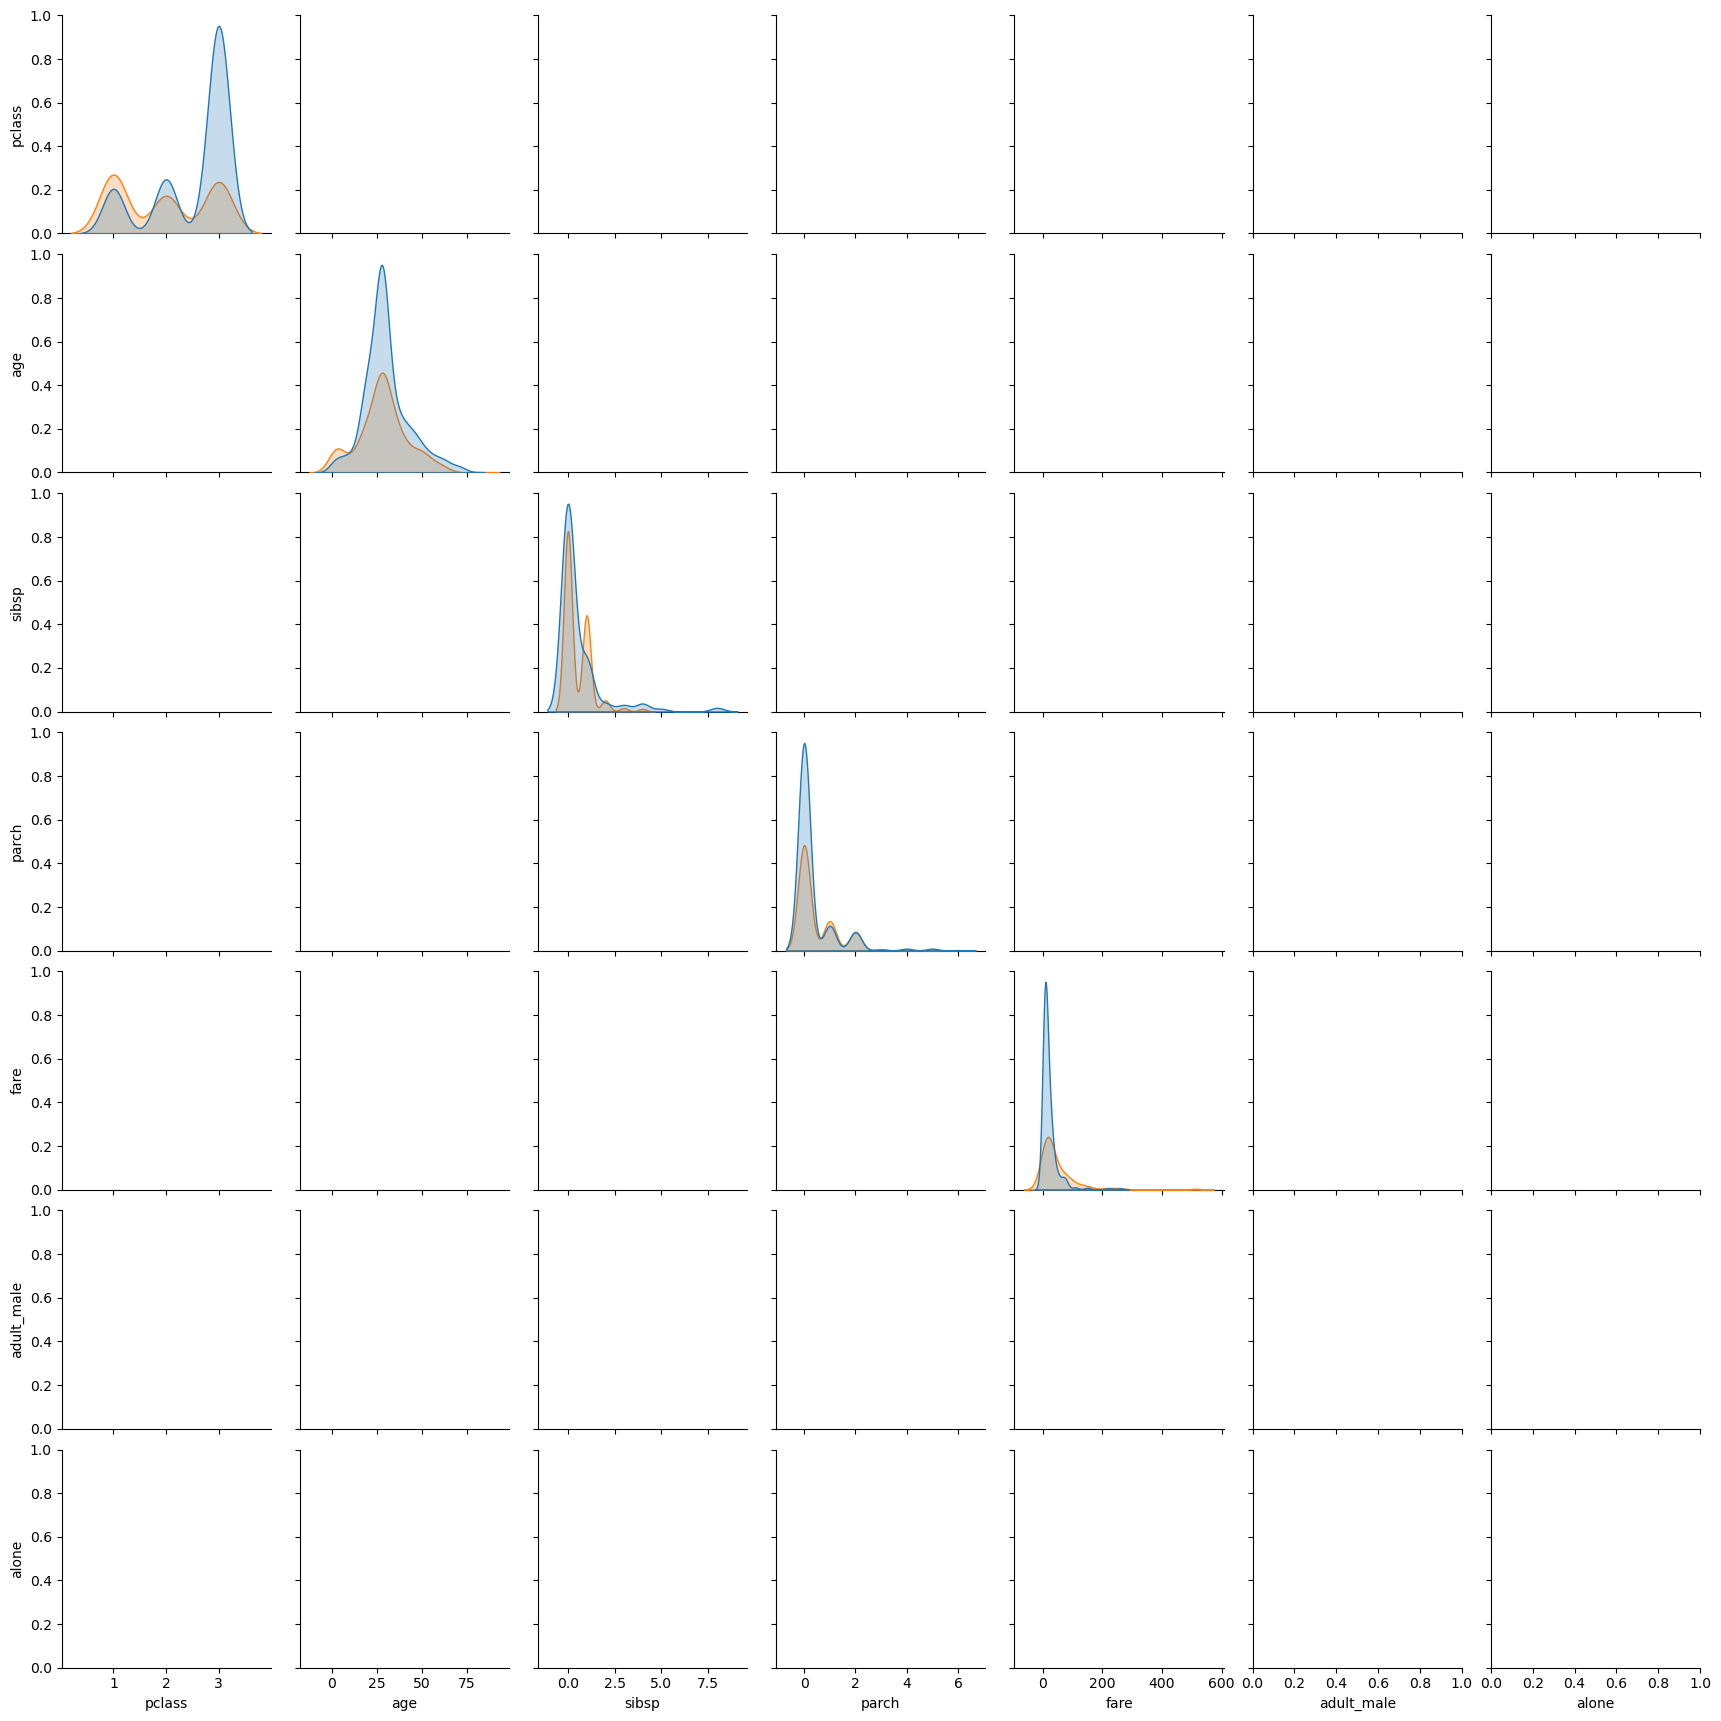

In [11]:
#
print(titanic['survived'].corr(titanic['adult_male']))
print(titanic['survived'].corr(titanic['fare']))
sns.pairplot(titanic, hue = 'survived')
plt.show()
# error: info보면 object, category는 안 그려주기 때문

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


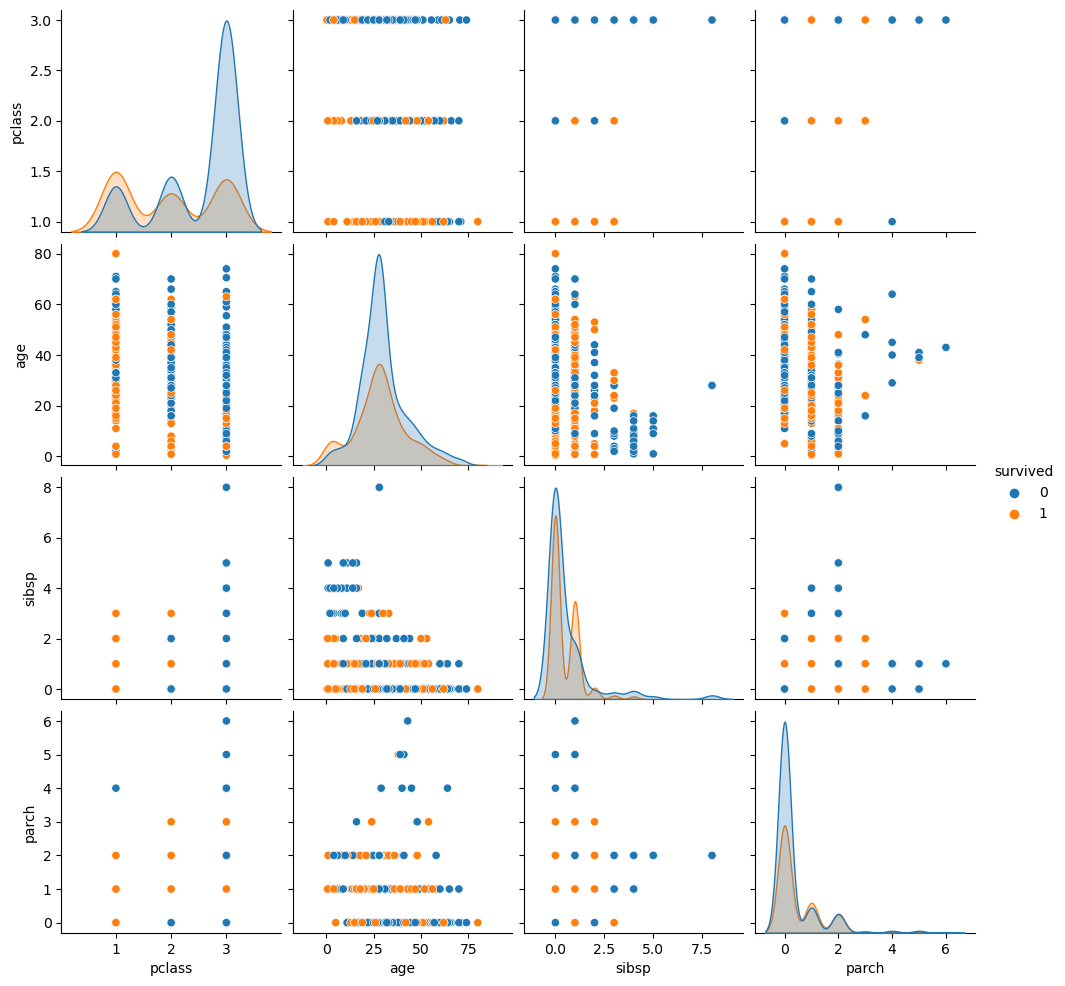

In [14]:
# object, 아닌 것들로 새로 만들어보기...
titanic1 = titanic[['survived', 'pclass', 'age', 'sibsp', 'parch']]
sns.pairplot(titanic1, hue = 'survived')
plt.show()
# 위의 속성들끼리 페어 플롯을 만든 것.

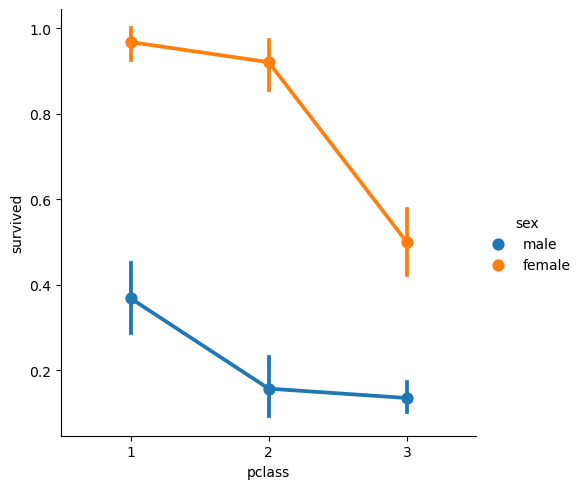

In [15]:
# 캐트 플롯: 클래스, 성별에 따른 생존률
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')
plt.show()

In [16]:
def category_age(x):
        if x < 10:
           return 0
        elif x < 20:
           return 1
        elif x < 30:
           return 2
        elif x < 40:
           return 3
        elif x < 50:
            return 4
        elif x < 60:
           return 5
        elif x < 70:
           return 6
        else:
           return 7

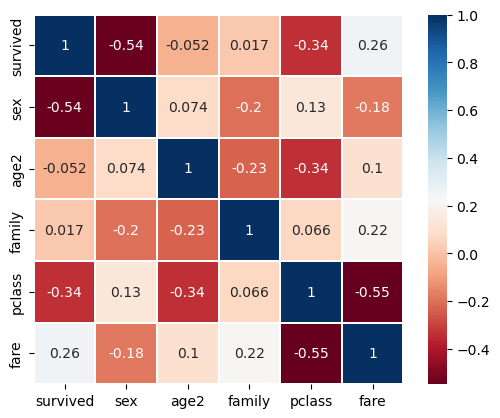

In [17]:
# 카테고리를 age2에 int로 변경.... 등등 object, categoty를 계산 가능하게 변경
# 히트맵 그리기: 상관계수 구하기, 파랑에 가까울수록 양의 상관관계, 빨간색에 가까울 수록 음의 상관관계
titanic['age2'] = titanic['age'].apply(category_age)
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1
#titanic.to_csv('./DATA/titanic3.csv', index = False)
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax
        = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True,
        annot_kws = {"size": 10})
plt.show()